<a href="https://colab.research.google.com/github/sftSalman/pytorchFundamental/blob/main/AZparctice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch 
from torch import nn 
from torchvision import datasets
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd 
from torchvision.transforms import ToTensor

In [21]:
# loading data from torchvision 

train_data = datasets.FashionMNIST(root='data',
                                   download=True,
                                   train = True,
                                   target_transform = None,
                                   transform=ToTensor())


In [22]:
test_data = datasets.FashionMNIST(root='data',
                                  train = False,
                                  download = True ,
                                  target_transform = None,
                                  transform = ToTensor()
                                  )


## exploring data 

In [23]:
len(train_data)


60000

In [24]:
len(test_data)

10000

In [25]:
#img , label = train_data[0]
data, label = train_data[0]


In [28]:
data.shape

torch.Size([1, 28, 28])

In [30]:
label

9

In [31]:
train_data.classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

Text(0.5, 1.0, 'Ankle boot')

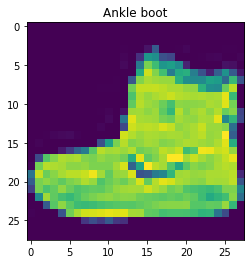

In [33]:
plt.imshow(data.squeeze())
plt.title(train_data.classes[label])

Visulization 

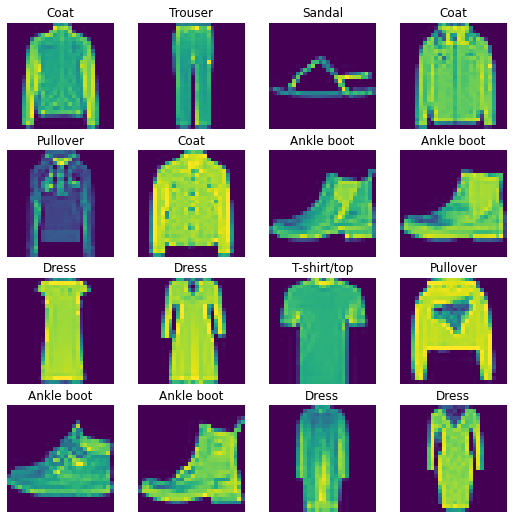

In [54]:
fig = plt.figure(figsize=(9,9))
row , colm = 4,4
for i in range(1,row*colm+1):
  random_idx = torch.randint(0, len(train_data), size=[1]).item()
  img , name = train_data[random_idx]
  fig.add_subplot(row,colm,i)
  plt.title(train_data.classes[name])
  plt.imshow(img.squeeze())
  plt.axis(False)

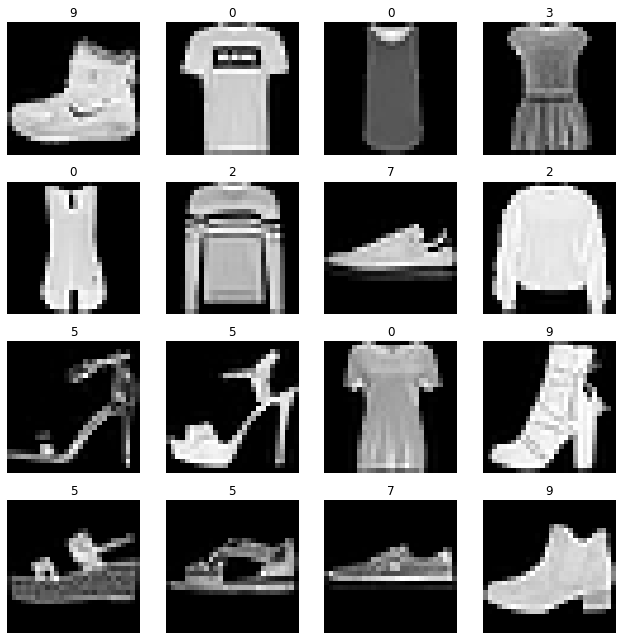

In [48]:
# chatGpt shows this way :
fig, axs = plt.subplots(4, 4, figsize=(9, 9))
for i in range(16):
    img, name = train_data[i]
    row = i // 4
    col = i % 4
    axs[row, col].imshow(img.squeeze(), cmap="gray")
    axs[row, col].set_title(name)
    axs[row, col].axis("off")
plt.tight_layout()
plt.show()


Making a simple model to classify the images 